In [51]:
import pandas as pd
import numpy as np
import pickle

In [86]:
df = pd.read_csv('../data/csv/triplet_embeddings.csv')

In [87]:
df.sample(5)

,id,0,1,2,3,4,5,6,7,8,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
5784,59695,-1.099907,0.168564,0.215490,1.205190,1.209852,1.074338,-1.252350,-1.029238,-1.584097,...,0.550816,-1.297127,0.772835,0.476766,1.184372,-0.124188,-0.194717,0.548685,0.060330,0.243048
6977,129375,-1.153811,0.118164,0.190874,0.806061,1.147137,1.099669,-1.268147,-1.009170,-1.552823,...,0.619524,-1.174403,0.812273,0.663917,1.102478,-0.626702,-0.260557,0.453243,-0.326585,0.394792
6892,125722,-1.037296,0.113681,0.277751,1.098560,0.872789,1.368638,-1.188924,-0.892201,-1.410179,...,0.616684,-1.261719,0.935047,0.640946,0.978900,-0.638191,-0.227733,0.413774,-0.368155,0.028139
3118,85966,-1.225523,0.129520,0.285281,1.053036,0.892763,1.580821,-1.095851,-0.808034,-1.686086,...,0.957011,-1.316537,0.961592,0.448943,1.231751,-0.718119,-0.136814,0.469830,-0.458229,0.051727
7412,68404,-0.967941,0.175182,0.396549,0.831040,1.358493,1.325840,-0.950915,-0.920698,-1.828015,...,0.480612,-1.297459,0.646482,0.407916,1.231359,-0.277889,0.074011,0.284591,-0.232166,0.789596


In [88]:
df.shape

(7994, 4097)

In [89]:
with open('../data/pickles/main_dict.pickle', 'rb') as f:
    main_dict = pickle.load(f)

In [90]:
df_info = pd.read_csv('../data/csv/info.csv')
df_info.sample(5)

,id,artist,title,genre,track,tags,test
4486,44809,Monk Turner + Fascinoma,Everything Already,Pop,044809.mp3,"['pop', 'creative commons', 'monk turner', 'ea...",0
7398,43796,Kreamy 'Lectric Santa,Sun explosion.mp3,Folk,043796.mp3,"['folk', 'freak-folk']",0
74,1249,Nautical Almanac,"""Cleanse Bath"" 10"" Metal Laquer",Experimental,001249.mp3,"['experimental', 'emotional hardcore', 'jazzzz...",0
4316,41192,Weyes Blood,Storms That Breed,Folk,041192.mp3,"['pop', 'psychedelic folk', 'folk', 'weyes blo...",0
909,98770,RoccoW,Weeklybeats 2014 #5 -I've Got Nothing,Electronic,098770.mp3,"['8-bit', 'under 2000 listeners', 'chiptune', ...",0


In [91]:
df[df['id'] == 110261]

,id,0,1,2,3,4,5,6,7,8,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
79,110261,-1.67776,-0.584743,0.614857,1.258465,1.476181,1.082987,-1.133017,-0.931665,-1.729738,...,0.092113,-1.047636,0.809729,0.229509,1.342238,-0.471161,-0.286002,0.694867,-0.118211,0.645087


In [92]:
df_info[df_info['test'] == 1]

,id,artist,title,genre,track,tags,test
6,190,Ed Askew,Castle Of Stars,Folk,000190.mp3,"['poetry', 'psychedelic folk', 'folk', 'experi...",1
8,194,Ed Askew,All I want to Do,Folk,000194.mp3,"['experimental', 'psychedelic folk', 'folk', '...",1
33,667,Explode Into Colors,Sharpen The Knife,International,000667.mp3,"['experimental', 'no-wave', 'international', '...",1
61,1040,Lightning Bolt,Dracula Mountain,Rock,001040.mp3,"['rock', 'experimental', 'avant-garde', 'noise...",1
137,3720,Indian Jewelry,Walking on the Water,Rock,003720.mp3,"['rock', 'experimental', 'drone', 'metaphysiqu...",1
...,...,...,...,...,...,...,...
7329,1686,The Sounds of Taraab,Rufiji,International,001686.mp3,['international'],1
7337,4233,The Sounds of Taraab,Interview,International,004233.mp3,"['middle east', 'international', 'african']",1
7374,27454,Sun Araw,Track 1,Experimental,027454.mp3,"['experimental', 'sun araw', 'drone', 'le club...",1
7386,40851,Str8 Sounds,Moving Toward You,Electronic,040851.mp3,['electronic'],1


In [93]:
df_test = df_info[df_info['test'] == 1][['id']].merge(df, how='left', on='id')
df_test.shape

(97, 4097)

In [94]:
df_train = df_info[df_info['test'] == 0][['id']].merge(df, how='left', on='id')
df_train.shape

(7903, 4097)

In [95]:
df_train.dropna(inplace=True)

In [96]:
df_train.shape

(7897, 4097)

In [13]:
df_train.to_csv('../data/csv/train_triplet.csv', index=False)
df_test.to_csv('../data/csv/test_triplet.csv', index=False)

In [97]:
X_train = df_train.drop(columns=['id']).values
X_test = df_test.drop(columns=['id']).values

In [98]:
def count_good_recommend(query_idx, answer_list, trhold):
    counter = 0
    query_id = int(df_test.iloc[query_idx].id)
    relevant = [query_id]
    query_tags = main_dict[query_id]['all_tags']
    for idx in answer_list:
        answer_id = int(df_train.iloc[idx].id)
        answer_tags = main_dict[answer_id]['all_tags']
        score = 0
        i = 0
        for tag in answer_tags:
            if tag in query_tags:
                i += 1
        if i == 0:
            continue
        
        precision = i / len(answer_tags)
        recall = i / len(query_tags)
        score = 2 * precision * recall / (precision + recall)
        if score >= trhold:        
            counter += 1
            relevant.append(answer_id)
    return counter, relevant

def count_ndcg(neighbors, relevant_list):
    dcg = 0
    idcg = 0
    for i in range(len(neighbors)):
        track = int(df_train.iloc[neighbors[i]].id)
        if track in relevant_list:
            dcg += 1 / np.log2(i + 2)
        idcg += 1 / np.log2(i + 2)
    ndcg = dcg / idcg
    return ndcg



In [66]:
from sklearn.decomposition import PCA

pca = PCA(0.99)
pca.fit(X_train)
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

In [99]:
X_train.shape, X_test.shape

((7897, 4096), (97, 4096))

In [100]:
from sklearn.metrics import pairwise_distances
for dist in ['euclidean', 'manhattan', 'chebyshev', 'braycurtis', 'canberra', 'correlation', 'dice', 'hamming', 'jaccard', 'kulsinski', 'minkowski', 'rogerstanimoto', 'russellrao', 'seuclidean', 'sokalmichener', 'sokalsneath', 'sqeuclidean', 'yule', 'cosine']:
    dist_mtx = pairwise_distances(X_test, X_train, metric=dist)
    mean_ap = 0
    ndcg = 0
    for i in range(97):
        arr = dist_mtx[i]
        neighbors = arr.argsort()[:10]
        relevant_num, relevant_list = count_good_recommend(i, neighbors, trhold=0.4)
    #     print(relevant_list)

        p_at_10 = relevant_num / 10
        mean_ap += p_at_10
        ndcg += count_ndcg(neighbors, relevant_list[1:])
    mean_ap /= 97 
    mean_ndcg = ndcg / 97
    
    print(dist, mean_ap, mean_ndcg)

euclidean 0.1432989690721649 0.1576336243891389
manhattan 0.14432989690721645 0.1582139505291484
chebyshev 0.12061855670103089 0.14296922269280352
braycurtis 0.14020618556701026 0.1576600205326058
canberra 0.12783505154639171 0.14389631367762354
correlation 0.13814432989690717 0.1552078620280673


/home/obi-1-konobe/projects/dp/music_similarity/venv/lib/python3.6/site-packages/sklearn/metrics/pairwise.py:1765: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)


dice 0.0010309278350515464 0.0008082295770997456
hamming 0.006185567010309278 0.006451511662660056


/home/obi-1-konobe/projects/dp/music_similarity/venv/lib/python3.6/site-packages/sklearn/metrics/pairwise.py:1765: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


jaccard 0.0010309278350515464 0.0008082295770997456


/home/obi-1-konobe/projects/dp/music_similarity/venv/lib/python3.6/site-packages/sklearn/metrics/pairwise.py:1765: DataConversionWarning: Data was converted to boolean for metric kulsinski
  warnings.warn(msg, DataConversionWarning)


kulsinski 0.0010309278350515464 0.0008082295770997456
minkowski 0.1432989690721649 0.1576336243891389


/home/obi-1-konobe/projects/dp/music_similarity/venv/lib/python3.6/site-packages/sklearn/metrics/pairwise.py:1765: DataConversionWarning: Data was converted to boolean for metric rogerstanimoto
  warnings.warn(msg, DataConversionWarning)


rogerstanimoto 0.0010309278350515464 0.0008082295770997456


/home/obi-1-konobe/projects/dp/music_similarity/venv/lib/python3.6/site-packages/sklearn/metrics/pairwise.py:1765: DataConversionWarning: Data was converted to boolean for metric russellrao
  warnings.warn(msg, DataConversionWarning)


russellrao 0.0010309278350515464 0.0008082295770997456


/home/obi-1-konobe/projects/dp/music_similarity/venv/lib/python3.6/site-packages/sklearn/metrics/pairwise.py:1453: FutureWarning: from version 0.25, pairwise_distances for metric='seuclidean' will require V to be specified if Y is passed.
  "specified if Y is passed.", FutureWarning)


seuclidean 0.14432989690721645 0.15894299359554215


/home/obi-1-konobe/projects/dp/music_similarity/venv/lib/python3.6/site-packages/sklearn/metrics/pairwise.py:1765: DataConversionWarning: Data was converted to boolean for metric sokalmichener
  warnings.warn(msg, DataConversionWarning)


sokalmichener 0.0010309278350515464 0.0008082295770997456


/home/obi-1-konobe/projects/dp/music_similarity/venv/lib/python3.6/site-packages/sklearn/metrics/pairwise.py:1765: DataConversionWarning: Data was converted to boolean for metric sokalsneath
  warnings.warn(msg, DataConversionWarning)


sokalsneath 0.0010309278350515464 0.0008082295770997456
sqeuclidean 0.1432989690721649 0.1576336243891389


/home/obi-1-konobe/projects/dp/music_similarity/venv/lib/python3.6/site-packages/sklearn/metrics/pairwise.py:1765: DataConversionWarning: Data was converted to boolean for metric yule
  warnings.warn(msg, DataConversionWarning)


yule 0.0010309278350515464 0.0008082295770997456
cosine 0.13814432989690717 0.15512881272770904


In [170]:
for dist in ['euclidean', 'manhattan', 'chebyshev', 'braycurtis', 'canberra', 'correlation', 'dice', 'hamming', 'jaccard', 'kulsinski', 'minkowski', 'rogerstanimoto', 'russellrao', 'seuclidean', 'sokalmichener', 'sokalsneath', 'sqeuclidean', 'yule', 'cosine']:
    dist_mtx = pairwise_distances(X_test, X_train, metric=dist)
    mean_ap = 0
    ndcg = 0
    for i in range(97):
        arr = dist_mtx[i]
        neighbors = arr.argsort()[:10]
        relevant_num, relevant_list = count_good_recommend(i, neighbors, trhold=0.4)
    #     print(relevant_list)

        p_at_10 = relevant_num / 10
        mean_ap += p_at_10
        ndcg += count_ndcg(neighbors, relevant_list[1:])
    mean_ap /= 97 
    mean_ndcg = ndcg / 97
    
    print(dist, mean_ap, mean_ndcg)

euclidean 0.10618556701030923 0.1233855350427249
manhattan 0.1298969072164948 0.14709440841683796
chebyshev 0.08453608247422678 0.09880648083976178
braycurtis 0.13608247422680406 0.16320911971695717
canberra 0.1103092783505154 0.13634928309423044
correlation 0.11649484536082472 0.13569093005890856


/home/obi-1-konobe/projects/dp/music_similarity/venv/lib/python3.6/site-packages/sklearn/metrics/pairwise.py:1765: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)


dice 0.0030927835051546395 0.005346204139946759
hamming 0.0030927835051546395 0.005346204139946759


/home/obi-1-konobe/projects/dp/music_similarity/venv/lib/python3.6/site-packages/sklearn/metrics/pairwise.py:1765: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


jaccard 0.0030927835051546395 0.005346204139946759


/home/obi-1-konobe/projects/dp/music_similarity/venv/lib/python3.6/site-packages/sklearn/metrics/pairwise.py:1765: DataConversionWarning: Data was converted to boolean for metric kulsinski
  warnings.warn(msg, DataConversionWarning)


kulsinski 0.0030927835051546395 0.005346204139946759
minkowski 0.10618556701030923 0.1233855350427249


/home/obi-1-konobe/projects/dp/music_similarity/venv/lib/python3.6/site-packages/sklearn/metrics/pairwise.py:1765: DataConversionWarning: Data was converted to boolean for metric rogerstanimoto
  warnings.warn(msg, DataConversionWarning)


rogerstanimoto 0.0030927835051546395 0.005346204139946759


/home/obi-1-konobe/projects/dp/music_similarity/venv/lib/python3.6/site-packages/sklearn/metrics/pairwise.py:1765: DataConversionWarning: Data was converted to boolean for metric russellrao
  warnings.warn(msg, DataConversionWarning)


russellrao 0.0030927835051546395 0.005346204139946759


/home/obi-1-konobe/projects/dp/music_similarity/venv/lib/python3.6/site-packages/sklearn/metrics/pairwise.py:1453: FutureWarning: from version 0.25, pairwise_distances for metric='seuclidean' will require V to be specified if Y is passed.
  "specified if Y is passed.", FutureWarning)


seuclidean 0.05257731958762886 0.064568303901935


/home/obi-1-konobe/projects/dp/music_similarity/venv/lib/python3.6/site-packages/sklearn/metrics/pairwise.py:1765: DataConversionWarning: Data was converted to boolean for metric sokalmichener
  warnings.warn(msg, DataConversionWarning)


sokalmichener 0.0030927835051546395 0.005346204139946759


/home/obi-1-konobe/projects/dp/music_similarity/venv/lib/python3.6/site-packages/sklearn/metrics/pairwise.py:1765: DataConversionWarning: Data was converted to boolean for metric sokalsneath
  warnings.warn(msg, DataConversionWarning)


sokalsneath 0.0030927835051546395 0.005346204139946759
sqeuclidean 0.10618556701030923 0.1233855350427249


/home/obi-1-konobe/projects/dp/music_similarity/venv/lib/python3.6/site-packages/sklearn/metrics/pairwise.py:1765: DataConversionWarning: Data was converted to boolean for metric yule
  warnings.warn(msg, DataConversionWarning)


yule 0.0030927835051546395 0.005346204139946759
cosine 0.11752577319587626 0.13619031945492532


In [53]:
from sklearn.neighbors import NearestNeighbors
for dist in ['euclidean', 'manhattan', 'chebyshev']:
    neigh = NearestNeighbors(10, metric=dist)
    neigh.fit(X_train)
    mean_ap = 0
    ndcg = 0
    for i in range(97):
        neighbors = neigh.kneighbors([X_test[i]])[1][0]
        relevant_num, relevant_list = count_good_recommend(i, neighbors, trhold=0.4)
    #     print(relevant_list)

        p_at_10 = relevant_num / 10
        mean_ap += p_at_10
        ndcg += count_ndcg(neighbors, relevant_list[1:])
    mean_ap /= 97 
    mean_ndcg = ndcg / 97
    
    print(neigh.metric, mean_ap, mean_ndcg)

/home/obi-1-konobe/projects/dp/music_similarity/venv/lib/python3.6/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_neighbors=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


euclidean 0.10618556701030923 0.12198870811609176


/home/obi-1-konobe/projects/dp/music_similarity/venv/lib/python3.6/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_neighbors=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


manhattan 0.11752577319587626 0.13476945604241305


/home/obi-1-konobe/projects/dp/music_similarity/venv/lib/python3.6/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_neighbors=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


chebyshev 0.09175257731958761 0.10438718939528636


In [102]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=10, metric='euclidean')
neigh.fit(X_train)

NearestNeighbors(metric='euclidean', n_neighbors=10)

In [103]:
for i in range(97):
    neighbors = neigh.kneighbors([X_test[i]])[1][0]
#         relevant_num, relevant_list = count_good_recommend(i, neighbors, trhold=0.4)
#         print(relevant_list)
    id_list = [int(df_train.iloc[x].id) for x in neighbors]
    print(int(df_test.iloc[i].id), id_list)
        

190 [621, 211, 67597, 66058, 92292, 204, 200, 130944, 93710, 133639]
194 [621, 52120, 92292, 105715, 85968, 67597, 118738, 52118, 43600, 107583]
667 [108050, 666, 70402, 130367, 134594, 111397, 28376, 128825, 40598, 58225]
1040 [1039, 106953, 145067, 50543, 50836, 86441, 6684, 145068, 6778, 56559]
3720 [47471, 51292, 92885, 124394, 6788, 119574, 40182, 4022, 59448, 73193]
4079 [121592, 131656, 44797, 4080, 109203, 23037, 125778, 121593, 141901, 143995]
4835 [4836, 71303, 4022, 71721, 73193, 125001, 1270, 98028, 59374, 64035]
5264 [63733, 11299, 149689, 71216, 4685, 4682, 128927, 75754, 64523, 107809]
10382 [12067, 40232, 52860, 77522, 10447, 40229, 12061, 32340, 10375, 18877]
93075 [94632, 96627, 34167, 114036, 43025, 44794, 120189, 122805, 111401, 777]
97886 [97887, 121869, 119922, 99442, 99439, 142950, 111982, 121867, 68820, 109355]
99411 [72290, 73192, 63191, 111658, 40940, 79575, 72288, 73193, 124201, 91092]
99419 [73193, 73192, 73520, 72290, 109497, 99442, 73519, 73522, 72288, 594

In [64]:
for i in range(97):
    neighbors = neigh.kneighbors([X_test[i]])[1][0]
    relevant_num, relevant_list = count_good_recommend(i, neighbors, trhold=0.4)
    print(relevant_list)
#     id_list = [int(df_train.iloc[x].id) for x in neighbors]
#     print(int(df_test.iloc[i].id), id_list)
        

[190, 621]
[194, 12052]
[667, 666]
[1040]
[3720]
[4079, 4076]
[4835, 4838, 136094]
[5264, 4682, 4688, 4685]
[10382]
[93075]
[97886, 97887]
[99411, 73192]
[99419, 53807, 73192]
[11786]
[12050, 12060, 40245]
[12394]
[14063]
[17607, 43024]
[19759, 19758, 66650, 149103]
[21401]
[22476]
[24429, 36983, 36984]
[24431, 24425, 36987, 24432]
[81554]
[85027]
[85832]
[86788]
[87097, 30196, 131917, 108885]
[87100, 87105, 131917]
[104282]
[107579]
[108879, 108884, 69762]
[108962]
[69204, 69207]
[71620, 71617]
[73365, 73371, 73367, 128484]
[73368, 141616, 97544]
[73761]
[73764]
[74421]
[75317]
[75417, 75380, 98548, 75372, 58207, 75396, 75418]
[75436, 75429]
[75752]
[49073, 7548]
[51305]
[55121, 61175, 55124]
[55235, 148074]
[57273, 107532]
[24898, 24899, 24915, 44347]
[24901, 90278, 24899]
[25234, 25235, 25227, 25233]
[25603, 152103, 148076]
[26021, 26017]
[26600]
[33020]
[35462]
[124702]
[124754, 130129]
[124876, 131911]
[125154]
[125161]
[39291]
[39357]
[40233, 10447, 10481, 10386, 10485, 53587, 11

In [172]:
neigh = NearestNeighbors(n_neighbors=10, metric='braycurtis')
neigh.fit(X_train)

NearestNeighbors(metric='braycurtis', n_neighbors=10)

In [173]:
for i in range(97):
    neighbors = neigh.kneighbors([X_test[i]])[1][0]
    relevant_num, relevant_list = count_good_recommend(i, neighbors, trhold=0.4)
    print(relevant_list)

[190]
[194, 200, 211]
[667, 666]
[1040]
[3720]
[4079, 4076]
[4835]
[5264, 4682, 4685]
[10382]
[93075]
[97886, 97887]
[99411, 73192]
[99419, 53807, 73192, 73193]
[11786, 11793]
[12050, 12060, 40244, 40245]
[12394]
[14063]
[17607, 43024, 56468]
[19759, 19758, 66650, 149103]
[21401]
[22476]
[24429, 36984, 36994]
[24431, 36987, 24425]
[81554]
[85027]
[85832]
[86788]
[87097, 30196, 131917, 87099]
[87100, 87105, 87103, 87104, 87099, 87098]
[104282]
[107579]
[108879, 108884]
[108962, 52522]
[69204, 92551]
[71620, 71617]
[73365, 73367, 73371]
[73368, 73370]
[73761]
[73764]
[74421]
[75317]
[75417, 75380, 75396, 75389, 98548, 58207]
[75436, 75429]
[75752, 108490]
[49073, 7548]
[51305]
[55121, 55124, 61175]
[55235, 148074]
[57273, 107532]
[24898, 24899, 90278, 24917, 24915]
[24901, 90278, 24899, 24917]
[25234, 25235, 25227, 25233, 25232]
[25603]
[26021, 26017]
[26600]
[33020]
[35462, 57627]
[124702, 11782]
[124754]
[124876, 131911]
[125154]
[125161]
[39291]
[39357]
[40233, 10447, 10481, 10485, 53

In [127]:
nei gh.kneighbors([X_test[0]])

(array([[1753.17949472, 1768.10015142, 1799.57718028, 1842.47599761,
         1881.04826856, 1882.1805356 , 1885.58850433, 1929.62312179,
         1942.72758734, 1948.20557632]]),
 array([[ 464, 3719, 1966,   28, 4559,  329, 5127, 7777, 2284, 1965]]))

In [21]:
from sklearn.metrics import pairwise_distances

dist = pairwise_distances(X_test, X_train, metric='manhattan')

In [155]:
idx = dist[0].argsort()
idx[:10]

array([ 464, 3719, 1966,   28, 4559,  329, 5127, 7777, 2284, 1965])

In [83]:
c = 0
for i in main_dict:
    if len(main_dict[i]['all_tags']) < 2:
        print(main_dict[i]['artist_name'], '-', main_dict[i]['track_title'])
        c += 1
c

Glove Compartment - Relaxing
Peter Biedermann - Circles
Peter Biedermann - Copenhagen
Peter Biedermann - Running
Peter Biedermann - Christiania
Peter Biedermann - The Uncommon Man
Peter Biedermann - Labyrinth
Peter Biedermann - Cover Up
Alan Vega & Oneida - Rocket USA
Mported Flows - Advice (Instrumental)
Mported Flows - Sensitive Information
Mported Flows - Master Plan (Dark Days Instrumental)
Mported Flows - Master Plan (Show Disc Instrumental)
Mported Flows - Master Plan (Bonus Beat Break Dubb)
Mported Flows - Sad But True (Non-Album Track)
Three Jolly Rogues - The Fish in the Sea
Three Jolly Rogues - Good Old Colony Days
The Bins & Nardo - Dreams Of Summer
Deadly Combo - Can I Get A Clap
Deadly Combo - Once Again (Featuring E FeungShui, J-Phillz, Javier Starks, Golden Child, Dave C & Cable)
Deadly Combo - Back To Break Bread (Instrumental)
Deadly Combo - Incredible Things (Instrumental)
Deadly Combo - Incredible Things (Featuring Golden Child) (Accapella)
Deadly Combo - Think Logic

528

In [97]:
from sklearn.decomposition import PCA

pca = PCA(0.95)
pca.fit(X_train)
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

In [98]:
cos_similarity_mtx = cosine_similarity(X_test, X_train)

In [99]:
mean_ap = 0
ndcg = 0
for i in range(97):
    arr = cos_similarity_mtx[i]
    neighbors = arr.argsort()[-10:][::-1]
    relevant_num, relevant_list = count_good_recommend(i, neighbors, trhold=0.4)
#     print(relevant_list)
#     print(relevant_list[0], [df_train.iloc[x].file[:-4] for x in neighbors])
    p_at_10 = relevant_num / 10
    mean_ap += p_at_10
    ndcg += count_ndcg(neighbors, relevant_list[1:])
mean_ap /= 97 
mean_ndcg = ndcg / 97
print(mean_ap, mean_ndcg)

0.11855670103092777 0.13406893551584873


In [100]:
for dist in ['euclidean', 'manhattan', 'chebyshev']:
    neigh = NearestNeighbors(n_neighbors=10, metric=dist)
    neigh.fit(X_train)
    mean_ap = 0
    ndcg = 0
    for i in range(97):
        neighbors = neigh.kneighbors([X_test[i]])[1][0]
        relevant_num, relevant_list = count_good_recommend(i, neighbors, trhold=0.4)
    #     print(relevant_list)

        p_at_10 = relevant_num / 10
        mean_ap += p_at_10
        ndcg += count_ndcg(neighbors, relevant_list[1:])
    mean_ap /= 97 
    mean_ndcg = ndcg / 97
    
    print(neigh.metric, mean_ap, mean_ndcg)

euclidean 0.10721649484536078 0.12144433887637733
manhattan 0.12268041237113399 0.13432929444693986
chebyshev 0.08453608247422678 0.09880648083976178


In [21]:
from sklearn.manifold import TSNE

X = df.drop(columns=['id']).values
tsne = TSNE(n_components=2, verbose=0, perplexity=50, n_iter=300)
tsne_results = tsne.fit_transform(X)



In [22]:
df_viz = df[['id']]
df_viz['tsne-one'] = tsne_results[:,0]
df_viz['tsne-two'] = tsne_results[:,1]

/home/obi-1-konobe/projects/dp/music_similarity/venv/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/obi-1-konobe/projects/dp/music_similarity/venv/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [23]:
df_viz = df_viz.merge(df_info[['id', 'genre']], how='left', on='id')

In [24]:
my_palette = {
    'Rock': 'green',
    'Pop': 'red',
    'Hip-Hop': 'blue',
    'Folk': 'green',
    'Experimental': 'brown',
    'Instrumental': 'yellow',
    'Electronic': 'orange',
    'International': 'pink',
    'test': 'black'
}

In [25]:
df_viz['color'] = [my_palette[x] for x in df_viz['genre']]

<AxesSubplot:xlabel='tsne-one', ylabel='tsne-two'>

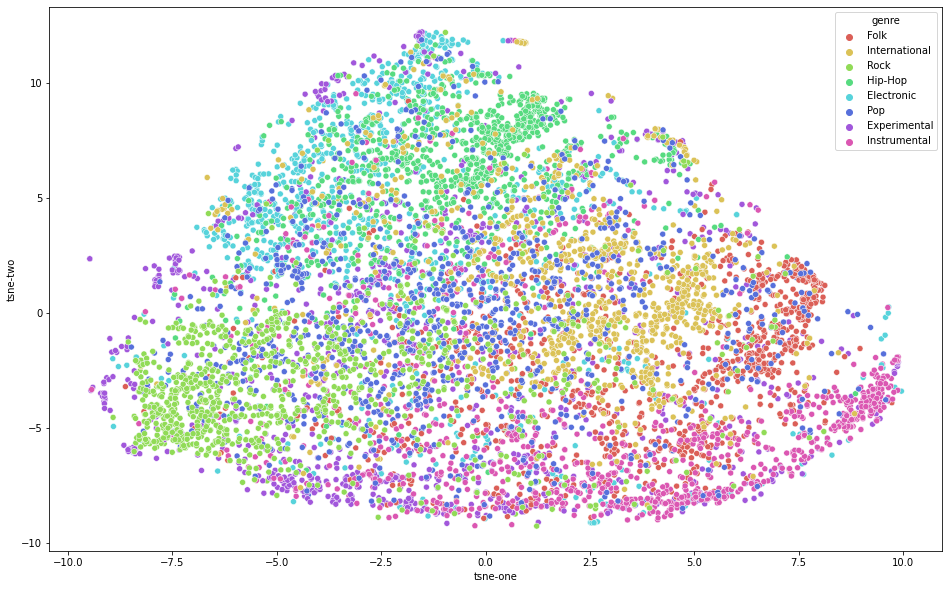

In [115]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-one", y="tsne-two",
    hue="genre",
    palette=sns.color_palette("hls", 8),
    data=df_viz,
    legend="full",
    alpha=1
)

<AxesSubplot:xlabel='tsne-one', ylabel='tsne-two'>

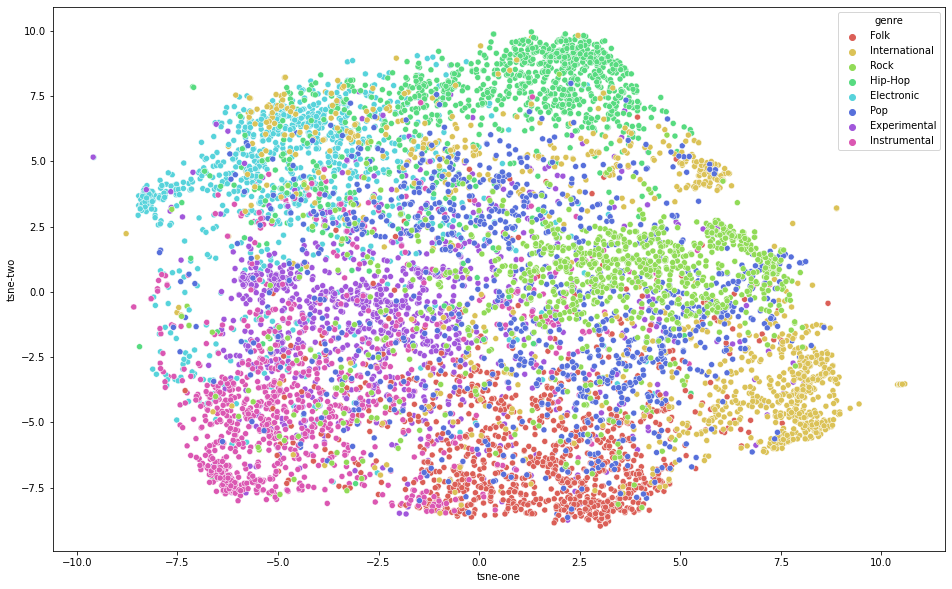

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-one", y="tsne-two",
    hue="genre",
    palette=sns.color_palette("hls", 8),
    data=df_viz,
    legend="full",
    alpha=1
)

In [27]:
sub_df = df_viz[df_viz.genre.isin(['Electronic', 'Hip-Hop', 'Rock', 'Instrumental', 'Folk'])]

<AxesSubplot:xlabel='tsne-one', ylabel='tsne-two'>

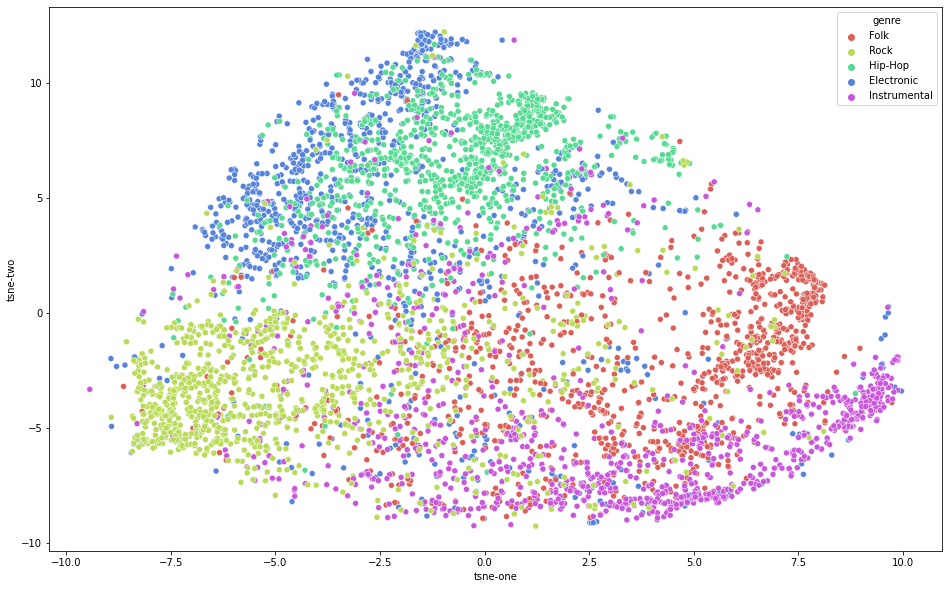

In [120]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-one", y="tsne-two",
    hue="genre",
    palette=sns.color_palette("hls", 5),
    data=sub_df,
    legend="full",
    alpha=1
)

<AxesSubplot:xlabel='tsne-one', ylabel='tsne-two'>

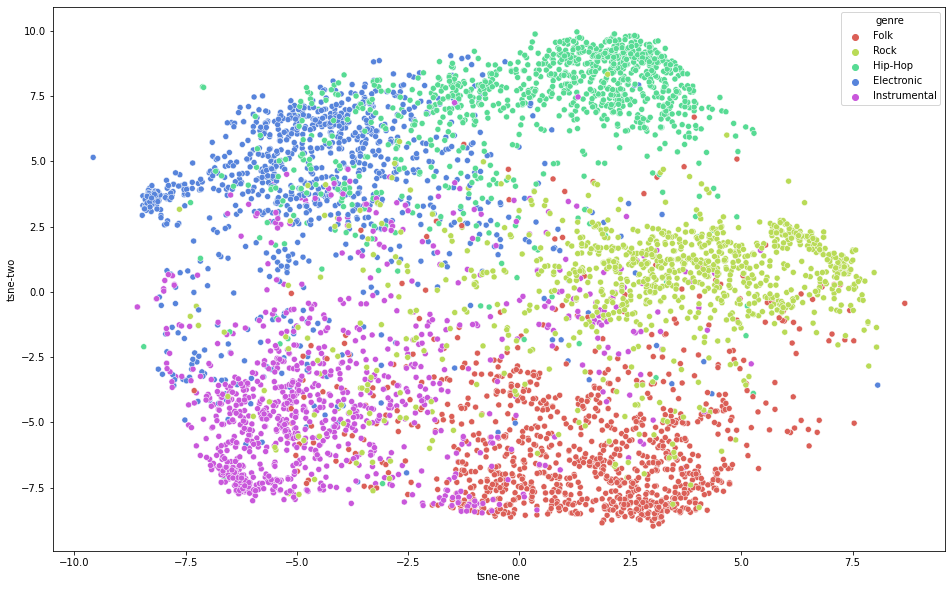

In [28]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-one", y="tsne-two",
    hue="genre",
    palette=sns.color_palette("hls", 5),
    data=sub_df,
    legend="full",
    alpha=1
)

In [29]:
tsne = TSNE(n_components=3, verbose=0, perplexity=5, learning_rate=10)
tsne_results = tsne.fit_transform(X)

In [30]:
df_viz['tsne-one'] = tsne_results[:,0]
df_viz['tsne-two'] = tsne_results[:,1]
df_viz['tsne-three'] = tsne_results[:,2]

In [31]:
sub_df = df_viz[df_viz.genre.isin(['Electronic', 'Hip-Hop', 'Rock', 'Instrumental', 'Folk'])]

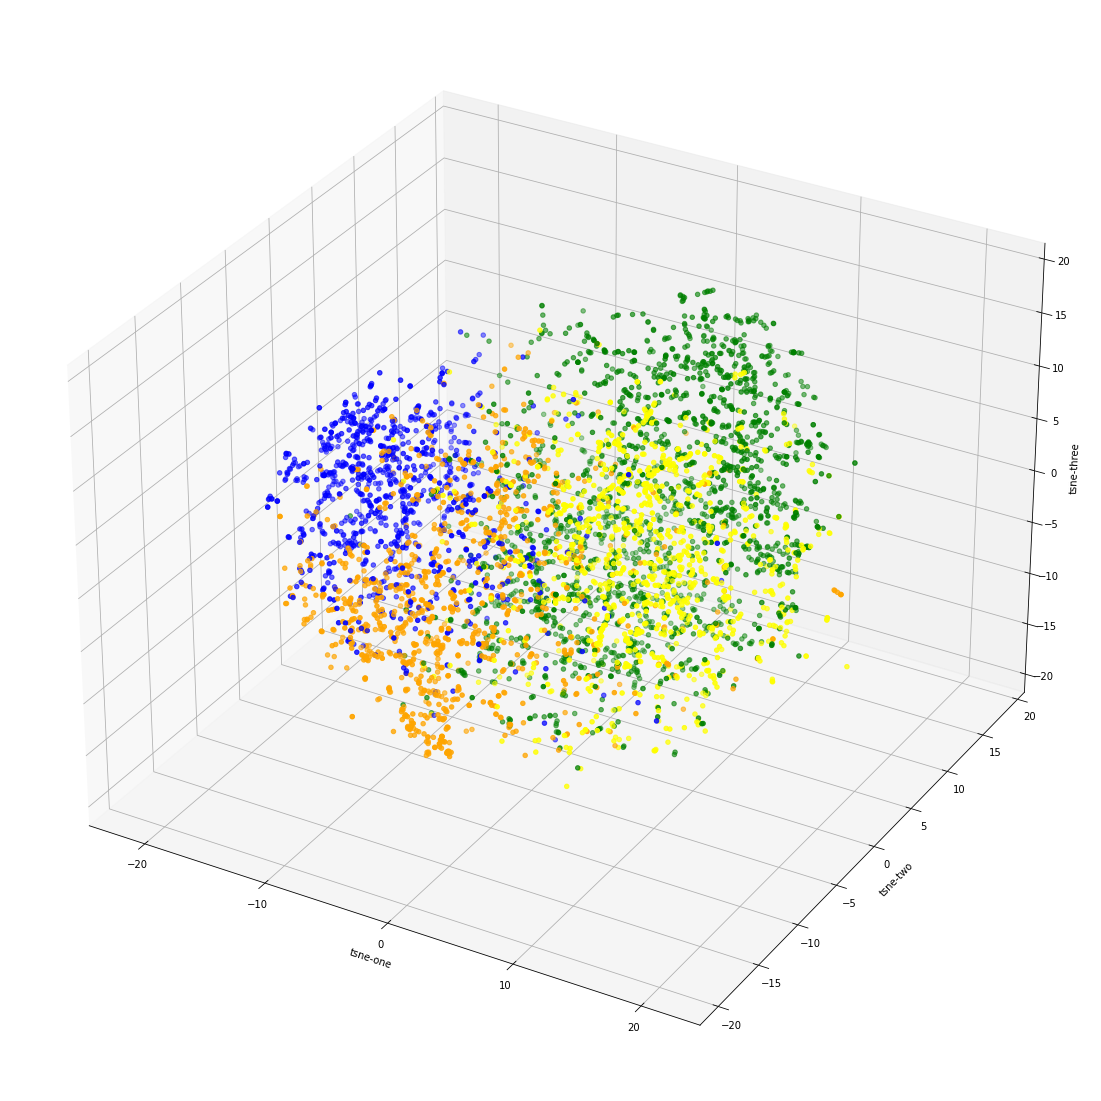

In [32]:
ax = plt.figure(figsize=(30,20)).gca(projection='3d')
ax.scatter(
    xs=sub_df["tsne-one"], 
    ys=sub_df["tsne-two"], 
    zs=sub_df["tsne-three"], 
    c=sub_df["color"], 
    cmap='tab10'
)
ax.set_xlabel('tsne-one')
ax.set_ylabel('tsne-two')
ax.set_zlabel('tsne-three')
plt.show()